Descriptive analysis on the UNHCR data

In [8]:
import pandas as pd

df = pd.read_csv('../../data/data.csv', engine="pyarrow").drop('', axis=1).drop_duplicates(subset=['Country_o','Country_d','year'])
df = df[(df.year <=2021)]

In [12]:
df.groupby(['iso_o','year']).newarrival.sum()

iso_o  year
ABW    2000       0.0
       2001       0.0
       2002       0.0
       2003       0.0
       2004       0.0
                ...  
ZWE    2017    4523.0
       2018    1908.0
       2019    3371.0
       2020    1196.0
       2021     640.0
Name: newarrival, Length: 4312, dtype: float64

Is this dataset balanced?

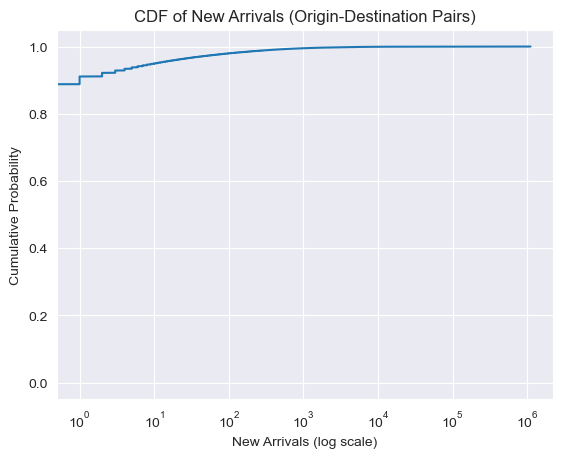

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

sorted_values = np.sort(df.newarrival)
cumulative_prob = np.arange(len(sorted_values)) / float(len(sorted_values))

plt.plot(sorted_values, cumulative_prob)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('New Arrivals (log scale)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of New Arrivals (Origin-Destination Pairs)')
plt.grid(True)
plt.show()

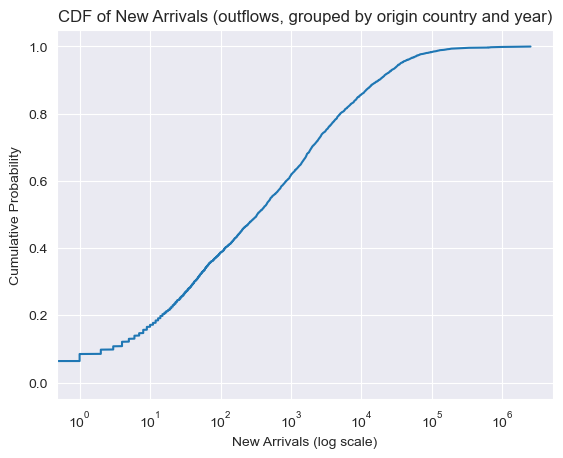

In [10]:
sorted_values = np.sort(df.groupby(['year','iso_o']).agg({'newarrival':'sum'}).newarrival.values)
cumulative_prob = np.arange(len(sorted_values)) / float(len(sorted_values))

plt.plot(sorted_values, cumulative_prob)
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('New Arrivals (log scale)')
plt.ylabel('Cumulative Probability')
plt.title('CDF of New Arrivals (outflows, grouped by origin country and year)')
plt.grid(True)
plt.show()

<Axes: title={'center': 'Number of Refugees from Syria to Turkey'}, xlabel='year'>

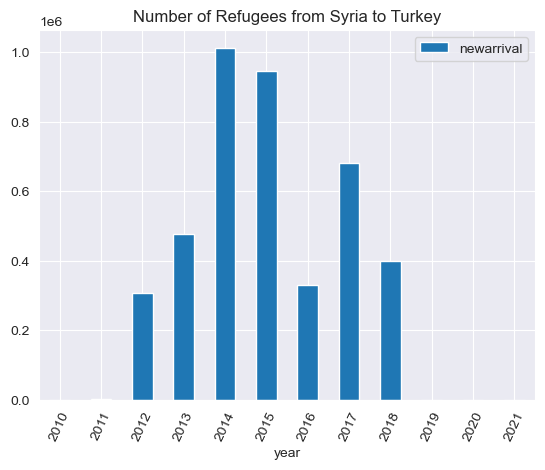

In [6]:
import seaborn as sns
sns.set_style('darkgrid')
df[(df.Id == 'SYRTUR') & (df.year >= 2010)].plot.bar(x='year',y='newarrival', title='Number of Refugees from Syria to Turkey', rot=65)

In [14]:
import plotly.express as px

norm_df = df[(df.iso_o == 'VEN') & (df.year > 2016) & (df.newarrival>10000)]
norm_df['newarrival'] = norm_df.groupby(['iso_o', 'year'])['newarrival'].transform(lambda x: x / x.sum())
# norm_df['year'] = norm_df['year'].astype('int')

fig = px.bar(norm_df, y="year", x="newarrival", color="iso_d", title="Refugees Leaving Venezuela by Destination Country", orientation = 'h')
fig.show()

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_32759/1575866411.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
import plotly.express as px

norm_df = df[(df.iso_o == 'AFG') & (df.year > 2014) & (df.newarrival>10000) ]
norm_df['newarrival'] = norm_df.groupby(['iso_o', 'year'])['newarrival'].transform(lambda x: x / x.sum())
# norm_df['year'] = norm_df['year'].astype('str')

fig = px.bar(norm_df, y="year", x="newarrival", color="iso_d", title="Refugees Leaving Afghanistan by Destination Country", orientation = 'h')
fig.show()

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_27028/4207888806.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
country_year = df.groupby(['iso_o', 'year']).newarrival.sum().reset_index()
country_year[country_year.newarrival > 1000000].iso_o.unique()

array(['SSD', 'SYR', 'VEN'], dtype=object)

In [61]:
import plotly.express as px

norm_df = df[(df.iso_o == 'SYR') & (df.year >= 2012) & (df.year <= 2018)  & (df.newarrival > 10000) ]
norm_df['newarrival'] = norm_df.groupby(['iso_o', 'year'])['newarrival'].transform(lambda x: x / x.sum())
# norm_df['year'] = norm_df['year'].astype('str')

fig = px.bar(norm_df, y="year", x="newarrival", color="iso_d", title="Refugees Leaving South Sudan by Destination Country", orientation = 'h')
fig.show()

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_78019/2009613314.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
import plotly.express as px

norm_df = df[(df.iso_o == 'SSD') & (df.year >= 2014)  ]
norm_df['newarrival'] = norm_df.groupby(['iso_o', 'year'])['newarrival'].transform(lambda x: x / x.sum())
# norm_df['year'] = norm_df['year'].astype('str')

fig = px.bar(norm_df, y="year", x="newarrival", color="iso_d", title="Refugees Leaving South Sudan by Country", orientation = 'h', labels='iso_d')
fig.show()

/var/folders/hs/1r2tlf751_l1nl8n9l2_wtpw0000gn/T/ipykernel_27028/3372920788.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

